In [1]:
fsize = (16,4)
list_colors = ['darkblue','orange','green','purple']
list_prop = ['Unit', 'Land', 'Building', 'Virtual_Unit']

### Sales

In [10]:
post = 'sales'
df1 = pd.concat([
    pd.read_pickle(f'preds/{post}_Land_20.pkl'),
    pd.read_pickle(f'preds/{post}_Building_20.pkl'),
    pd.read_pickle(f'preds/{post}_Unit_20.pkl'),
])
df1['Feats'] = 'With additional'

df2 = pd.concat([
    pd.read_pickle(f'preds/{post}_Land_0.pkl'),
    pd.read_pickle(f'preds/{post}_Building_0.pkl'),
    pd.read_pickle(f'preds/{post}_Unit_0.pkl'),
])
df2['Feats'] = 'Initial'

df = pd.concat([df1,df2])
print(df.shape)
df[:3]

(966916, 8)


,Property ID,Property Type,Amount,dt_month,dt_year,pred,subset,Feats
0,236028,Land,"2,400,000.00",2012-01-01,2012,"2,773,909.73",train,With additional
1,90111,Land,"2,784,375.00",2012-01-01,2012,"3,269,365.56",train,With additional
2,100614,Land,"1,700,000.00",2012-01-01,2012,"2,232,355.74",valid,With additional


In [3]:
# evaluation
df['MAE'] = abs(df['Amount'] - df['pred'])
df['MAPE'] = 100*abs(df['Amount'] - df['pred'])/df['Amount']

feats_eval = ['MAE','MAPE']
feats_gr = ['Property Type','Feats']

f1 = df['subset'] == 'valid'
df1 = df[f1].groupby(feats_gr)[feats_eval].mean().unstack()
fout = open(f'imgs/res_{post}.html','w')
fout.write(df1.to_html())
fout.close()
df1

MAE                    MAPE                
Feats              Initial With additional Initial With additional
Property Type                                                     
Building        170,716.39      168,324.85   10.65           10.76
Land          2,041,145.59    2,034,784.49   45.04           43.40
Unit            178,319.93      175,984.26   14.08           13.85

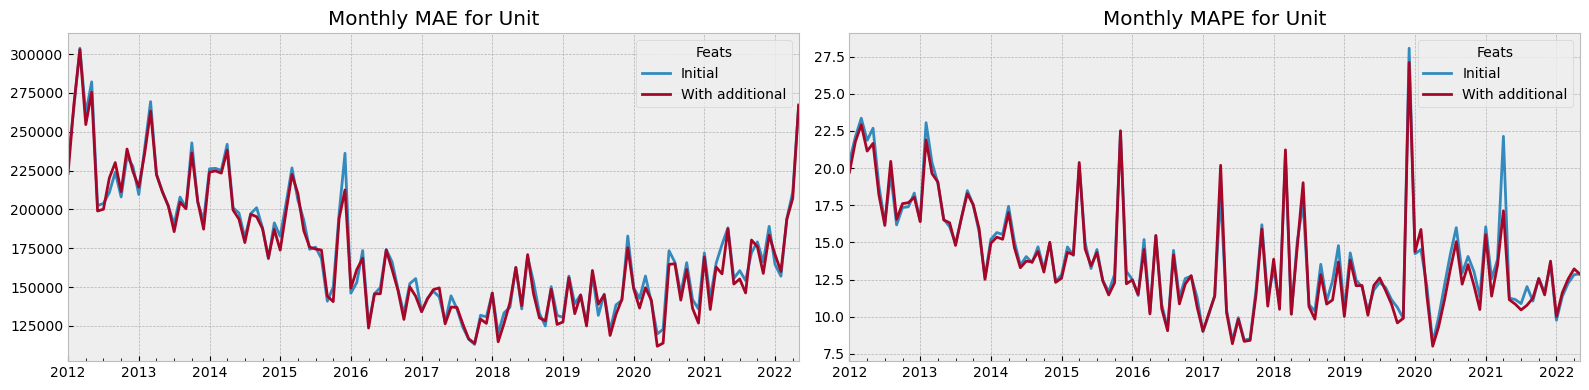

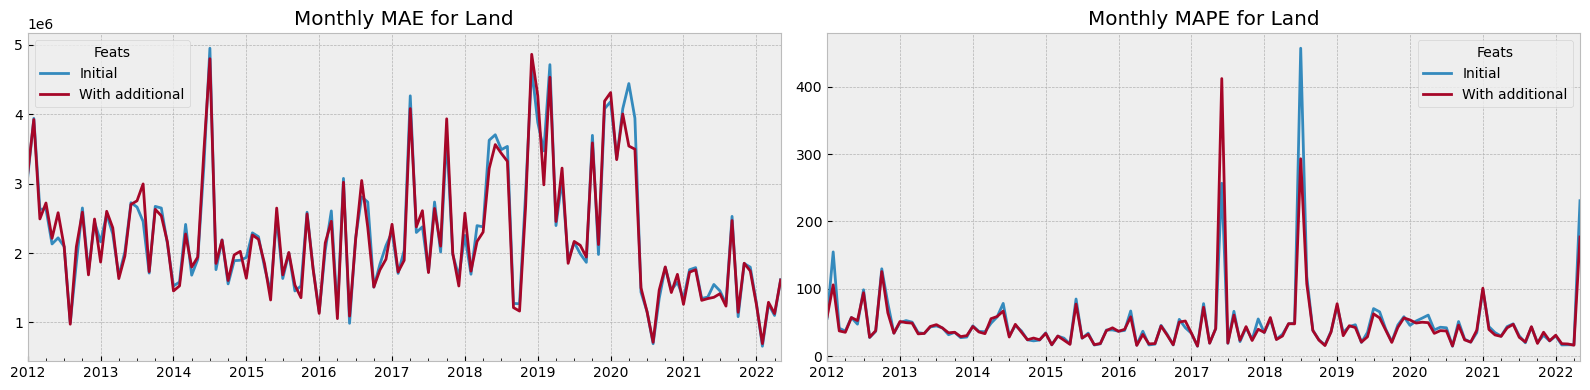

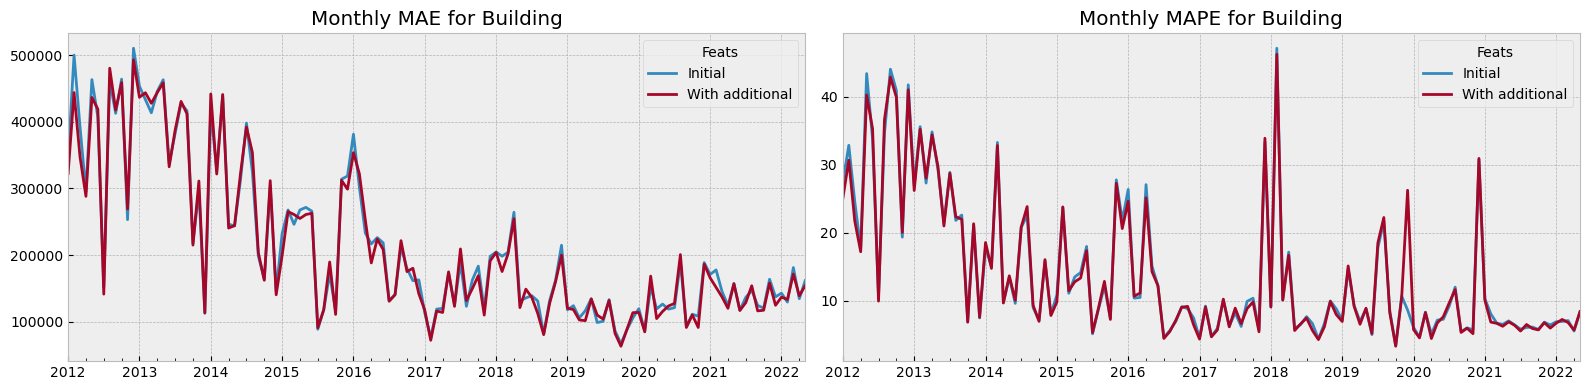

In [4]:
for i,t in enumerate(list_prop[:3]):
    _, ax = plt.subplots(1,2, figsize = fsize)
    f0 = df['subset'] == 'valid'
    f1 = df['Property Type'] == t
    filt = f0&f1
    
    df1 = df[filt].groupby(['dt_month','Feats'])['MAE'].mean().unstack()
    df1.plot(ax = ax[0], title = f"Monthly MAE for {t}", xlabel = '')
    
    df1 = df[filt].groupby(['dt_month','Feats'])['MAPE'].mean().unstack()
    df1.plot(ax = ax[1], title = f"Monthly MAPE for {t}", xlabel = '')
    
    plt.tight_layout()
    plt.savefig(f'imgs/res_{post}{i}.png')
    plt.show()

In [5]:
# {df1.mean()['test']:,.0f} | {a.std()['test']:,.0f}

### Rents

In [6]:
post = 'rents'
df1 = pd.concat([
    pd.read_pickle(f'preds/{post}_Land_20.pkl'),
    pd.read_pickle(f'preds/{post}_Building_20.pkl'),
    pd.read_pickle(f'preds/{post}_Unit_20.pkl'),
    pd.read_pickle(f'preds/{post}_Virtual_Unit_20.pkl'),
])
df1['Feats'] = 'With additional'

df2 = pd.concat([
    pd.read_pickle(f'preds/{post}_Land_0.pkl'),
    pd.read_pickle(f'preds/{post}_Building_0.pkl'),
    pd.read_pickle(f'preds/{post}_Unit_0.pkl'),
    pd.read_pickle(f'preds/{post}_Virtual_Unit_0.pkl'),
])
df2['Feats'] = 'Initial'

df = pd.concat([df1,df2])
print(df.shape)
df[:3]

(10819052, 8)


,Property ID,Property Type,Amount,dt_month,dt_year,pred,subset,Feats
0,454170,Land,"60,000.00",2012-07-01,2012,"59,992.94",train,With additional
1,317115474,Land,"3,600.00",2013-04-01,2013,"8,439.20",train,With additional
2,317136759,Land,"21,952.00",2013-04-01,2013,"35,995.11",valid,With additional


In [7]:
# evaluation
df['MAE'] = abs(df['Amount'] - df['pred'])
df['MAPE'] = 100*abs(df['Amount'] - df['pred'])/df['Amount']

feats_eval = ['MAE','MAPE']
feats_gr = ['Property Type','Feats']

f1 = df['subset'] == 'valid'
df1 = df[f1].groupby(feats_gr)[feats_eval].mean().unstack()
fout = open(f'imgs/res_{post}.html','w')
fout.write(df1.to_html())
fout.close()
df1

MAE                    MAPE                
Feats           Initial With additional Initial With additional
Property Type                                                  
Building      20,441.50       20,395.86   15.25           15.23
Land          14,031.49       13,504.47    9.73            9.86
Unit          13,066.90       13,048.80   25.44           25.06
Virtual_Unit  30,411.23       29,239.37   41.64           42.65

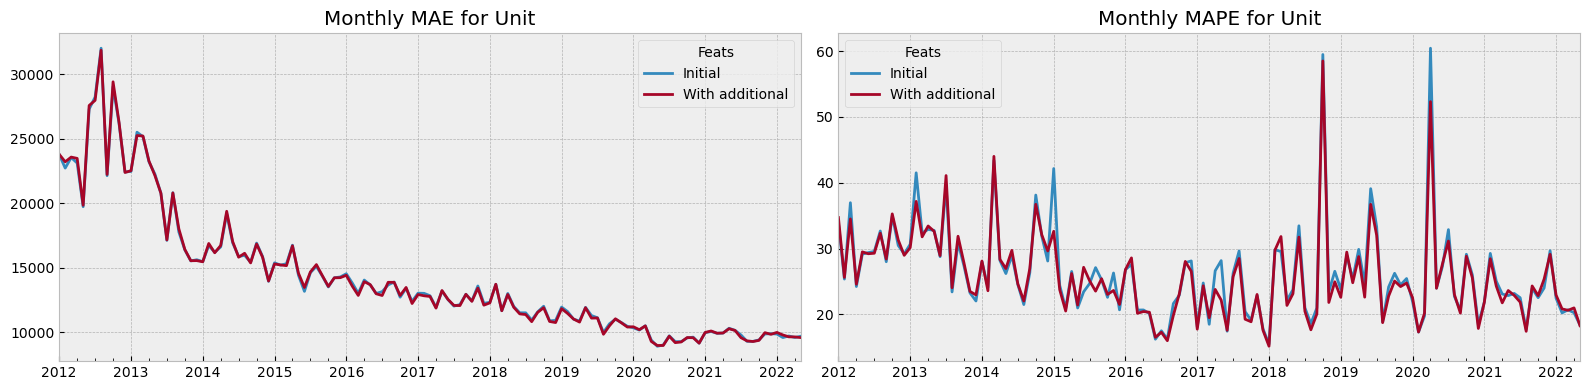

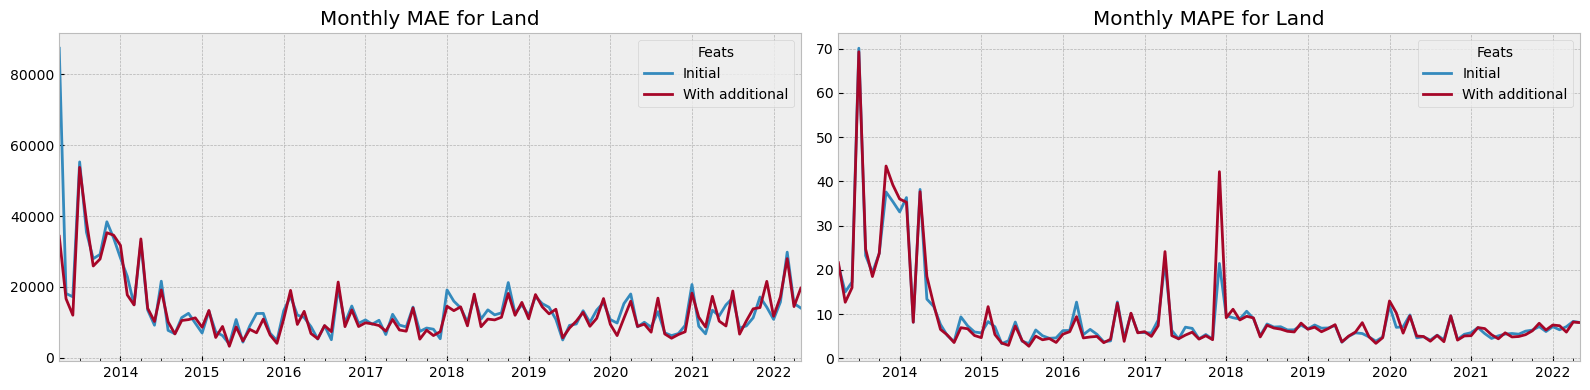

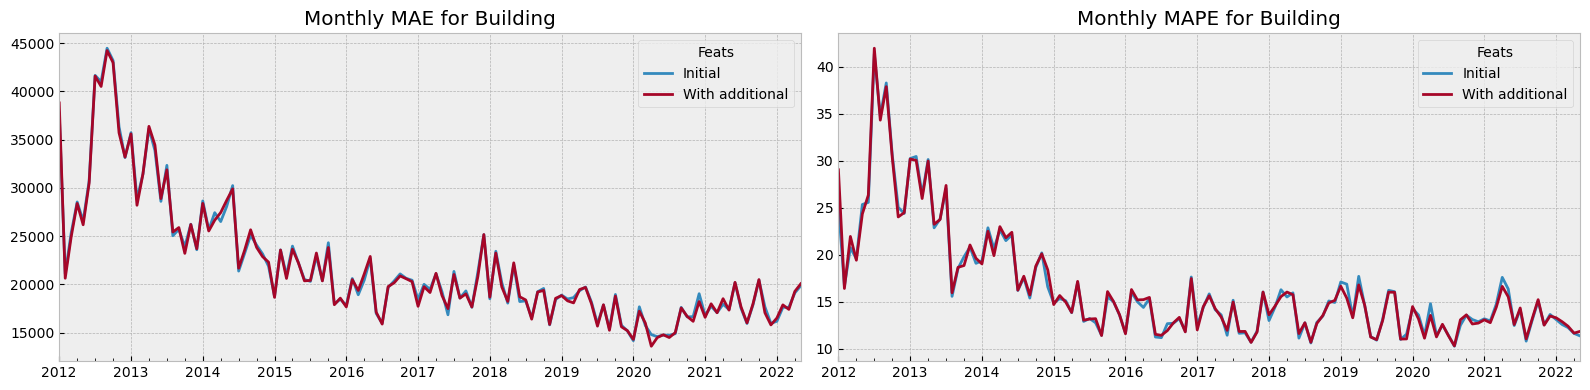

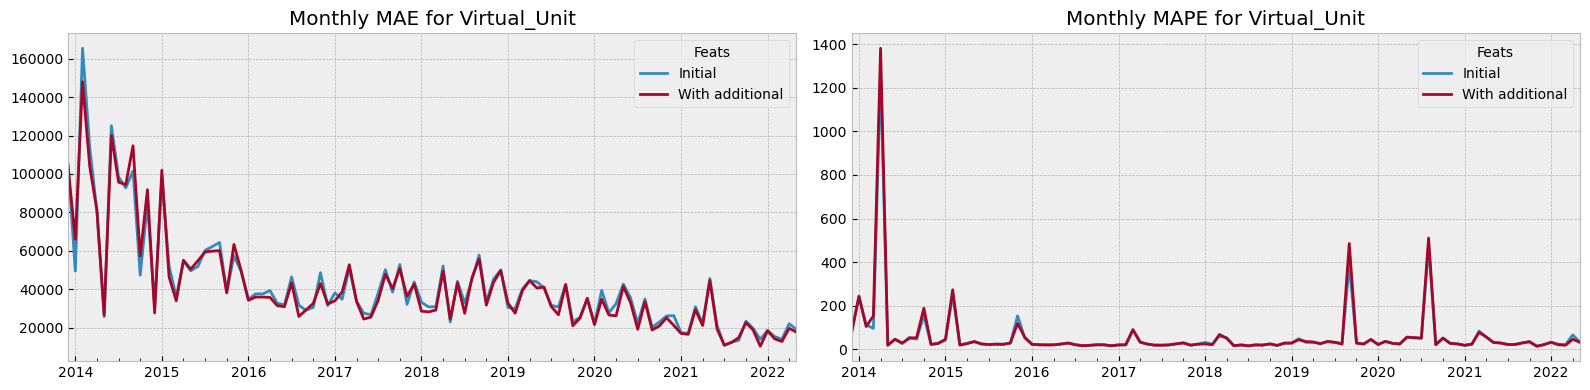

In [8]:
for i,t in enumerate(list_prop):
    _, ax = plt.subplots(1,2, figsize = fsize)
    f0 = df['subset'] == 'valid'
    f1 = df['Property Type'] == t
    filt = f0&f1
    
    df1 = df[filt].groupby(['dt_month','Feats'])['MAE'].mean().unstack()
    df1.plot(ax = ax[0], title = f"Monthly MAE for {t}", xlabel = '')
    
    df1 = df[filt].groupby(['dt_month','Feats'])['MAPE'].mean().unstack()
    df1.plot(ax = ax[1], title = f"Monthly MAPE for {t}", xlabel = '')
    
    plt.tight_layout()
    plt.savefig(f'imgs/res_{post}{i}.png')
    plt.show()

In [9]:
# {df1.mean()['test']:,.0f} | {a.std()['test']:,.0f}

### Bonus

In [60]:
post = 'sales'
df = pd.concat([
    pd.read_pickle(f'preds/{post}_Land_20.pkl'),
    pd.read_pickle(f'preds/{post}_Building_20.pkl'),
    pd.read_pickle(f'preds/{post}_Unit_20.pkl'),
])

df1 = df[df['dt_month'] > '2022-01-01']
del df1['dt_year']
del df1['subset']

for feat in ['Amount','pred']:
    df1[f'{feat}_rnk'] = 10*df1.groupby(['Property Type'])[f'{feat}'].rank(pct = True).clip(0,0.999)
    df1[f'{feat}_rnk'] = df1[f'{feat}_rnk'].map(np.floor).astype(int)

print(df1.shape)
df1[:3]

(28256, 7)


,Property ID,Property Type,Amount,dt_month,pred,Amount_rnk,pred_rnk
76820,1146704496,Land,"1,666,000.00",2022-02-01,"1,666,580.97",1,1
76821,467060061,Land,"8,745,888.00",2022-02-01,"9,097,843.96",8,8
76822,36234321,Land,"6,500,000.00",2022-02-01,"7,725,902.27",7,8


In [62]:
df1.groupby(['Property Type', 'Amount_rnk']).size().unstack()

Amount_rnk,0,1,2,3,4,5,6,7,8,9
Property Type,,,,,,,,,,
Building,302,308,296,302,292,312,302,303,298,307
Land,552,482,644,528,555,553,552,552,553,553
Unit,1968,1973,1968,1973,1966,1978,1967,1973,1972,1972


In [63]:
df1.groupby(['Property Type', 'pred_rnk']).size().unstack()

pred_rnk,0,1,2,3,4,5,6,7,8,9
Property Type,,,,,,,,,,
Building,302,302,306,292,308,303,302,302,302,303
Land,552,552,508,598,554,554,546,555,552,553
Unit,1970,1971,1970,1974,1967,1971,1964,1979,1973,1971


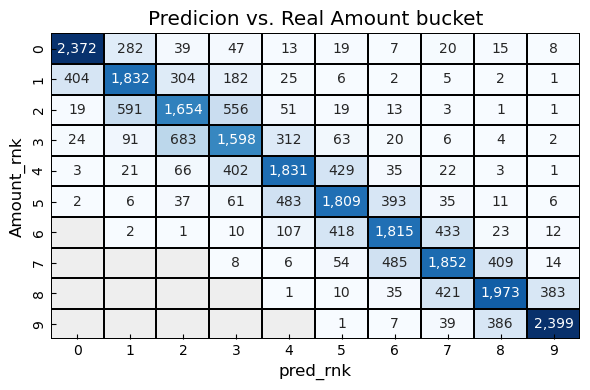

In [72]:
# plot
_, ax = plt.subplots(1,1, figsize = (6,4))

df_corr = df1.groupby(['Amount_rnk','pred_rnk']).size().unstack()
p = sns.heatmap(df_corr, ax = ax, annot = True, cmap = 'Blues', fmt = ',.0f', annot_kws={"size": 10}, cbar = False, linewidth = 0.1, linecolor = 'black')
_ = p.set_title(f'Predicion vs. Real Amount bucket')
# _ = p.set_xlabel('')
# _ = p.set_ylabel('')

ax.grid(False)

plt.tight_layout()
plt.savefig(f'imgs/res_{post}_bonus.png')
plt.show()

In [73]:
f1 = df1['Amount_rnk'] < 2
f2 = df1['pred_rnk'] > 7
df2 = df1[f1&f2].groupby('Property Type').last()

fout = open(f'imgs/res_{post}_bonus.html','w')
fout.write(df2.to_html())
fout.close()

df2

,Property ID,Amount,dt_month,pred,Amount_rnk,pred_rnk
Property Type,,,,,,
Building,859514334,"100,000.00",2022-03-01,"8,210,458.25",0,9
Land,1253380035,"142,707.68",2022-05-01,"7,679,044.50",0,8
Unit,276319953,"500,000.00",2022-05-01,"2,960,526.30",1,8
